# 6. Data Preprocessing

C’est la partie où nous convertissons la variable catégorique en forme numérique et créons un seul vecteur combinant toutes les entités en entrée

In [18]:
data = pd.read_csv('diabetes.csv')

In [19]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [20]:
# Check for their Count and Datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [21]:
# Check for total count of missing data
data.isnull().sum()
data.apply(lambda x:sum(x.isnull()),axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
# Check for Duplicate Values
data.duplicated().value_counts()

True     1256
False     744
Name: count, dtype: int64

In [23]:
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [250]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# save the model to disk
filenameXGB = 'finalizedScalerDiabete.sav'
pickle.dump(sc, open(filenameXGB, 'wb'))

In [26]:
# Print metrics:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as sklm
def model_evaluation(labels_test, predictions):
    metrics = sklm.precision_recall_fscore_support(labels_test, predictions)
    conf = sklm.confusion_matrix(labels_test, predictions)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels_test, predictions))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    # Print the evaluation metrics for the dataset.
    print(classification_report(labels_test, predictions))    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(labels_test, predictions)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Greens',fmt = '',
                xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# 8. Modeling

## 8.5 K-Nearest Neighbor Classifier (KNN)

### 8.5.1 K-Nearest Neighbor Classifier with defailt parameters

In [78]:
# Construction Model:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier = KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')
# fit the model
KNNClassifier.fit(X_train, y_train)
# Predict values for Test dataset
y_predKNNC = decisionTreeClassifier.predict(X_test)

                 Confusion matrix
                 Score positive    Score negative
Actual positive       260                 4
Actual negative         4               132

Accuracy  0.98
 
           Positive      Negative
Num case      264           136
Precision    0.98          0.97
Recall       0.98          0.97
F1           0.98          0.97
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       264
           1       0.97      0.97      0.97       136

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



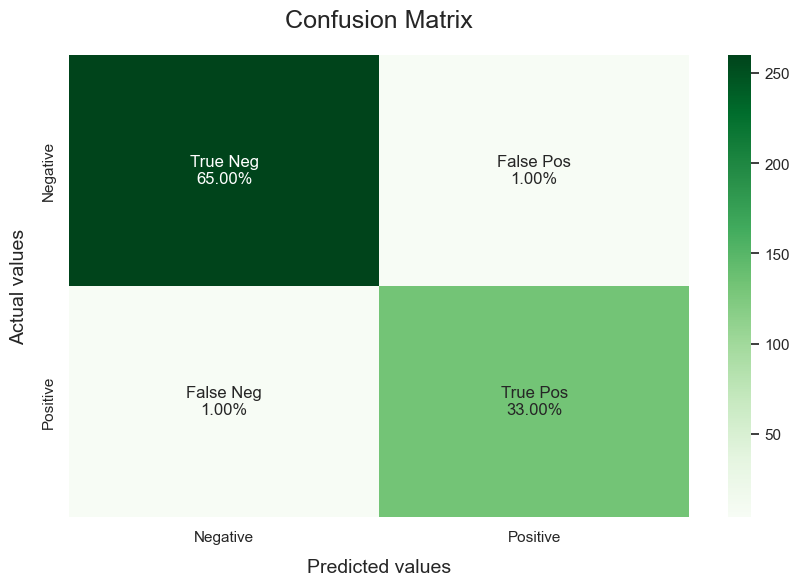

In [79]:
# Evaluation du modèle:
model_evaluation(y_test, y_predKNNC) 

### 8.5.2 K-Nearest Neighbor Classifier with Cross validation

In [80]:
bestKNNC = KNeighborsClassifier(n_neighbors=5)
bestKNNCScores = cross_validate(bestKNNC, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
bestKNNCScores = pd.DataFrame(bestKNNCScores, index = range(1, 11))
print(bestKNNCScores)

    fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
1   0.000696    0.006744        0.76875        0.697674     0.555556  0.618557
2   0.000618    0.006455        0.75000        0.629630     0.629630  0.629630
3   0.000608    0.006083        0.75625        0.648148     0.636364  0.642202
4   0.000790    0.006380        0.80625        0.706897     0.745455  0.725664
5   0.000600    0.006269        0.81250        0.735849     0.709091  0.722222
6   0.000627    0.006129        0.79375        0.750000     0.600000  0.666667
7   0.000633    0.005951        0.76875        0.680000     0.618182  0.647619
8   0.000581    0.005873        0.80625        0.750000     0.654545  0.699029
9   0.000585    0.005814        0.73750        0.622642     0.600000  0.611111
10  0.000583    0.005850        0.75625        0.700000     0.509091  0.589474


In [81]:
bestKNNCScores.mean()

fit_time          0.000632
score_time        0.006155
test_accuracy     0.775625
test_precision    0.692084
test_recall       0.625791
test_f1           0.655217
dtype: float64

### 8.5.3 Choosing Reasonable K Values with Elbow Method

In [82]:
testErrorRates = []
for k in range(1, 30):
    KNNClassifier = KNeighborsClassifier(n_neighbors=k)
    KNNClassifier.fit(X_train, y_train) 
   
    y_pred_Error = KNNClassifier.predict(X_test)
    testErrorRates.append(np.mean(y_pred_Error!=y_test))

Text(0, 0.5, 'Error_rate')

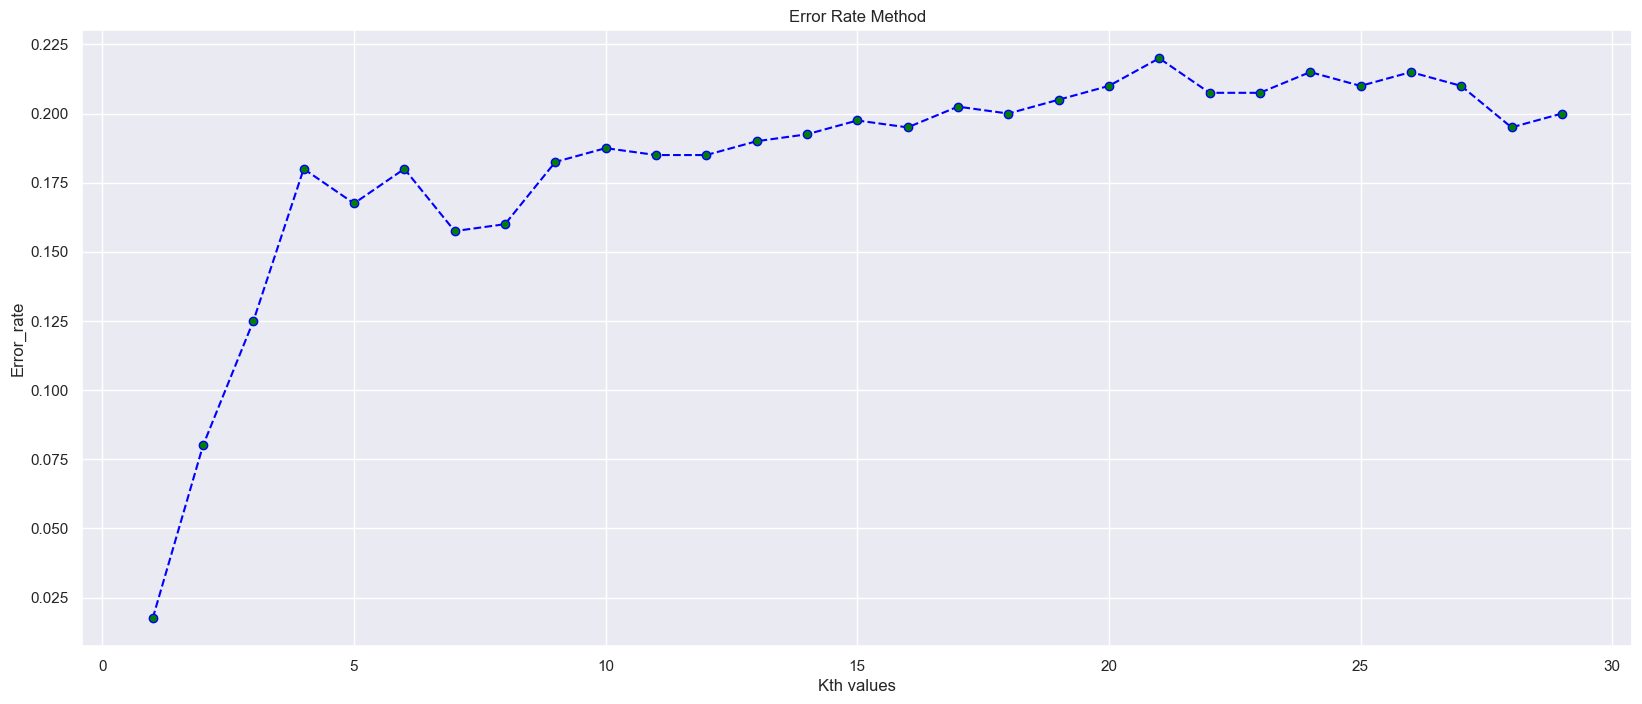

In [83]:
# Plot for Elbow Method
plt.figure(figsize=(20,8))
plt.plot(range(1,30),testErrorRates,color='blue',linestyle='dashed',marker='o',markerfacecolor='green')
plt.title("Error Rate Method")
plt.xlabel('Kth values')
plt.ylabel('Error_rate')

### 8.5.4 K-Nearest Neighbor Classifier with GridSearchCV

In [84]:
k = range(1, 30)
param_grid = {"n_neighbors": k, "p": [1, 2], "weights": ['uniform', "distance"]}

In [85]:
KNNGrid = KNeighborsClassifier()
KNNGridModel = GridSearchCV(KNNGrid, param_grid, cv=10, scoring='accuracy')
KNNGridModel.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [86]:
print('Best Parameters of GridSearchCV for KNN Classifier:', KNNGridModel.best_params_)
print('Best Estimator of GridSearchCV for KNN Classifier:', KNNGridModel.best_estimator_)

Best Parameters of GridSearchCV for KNN Classifier: {'n_neighbors': 18, 'p': 1, 'weights': 'distance'}
Best Estimator of GridSearchCV for KNN Classifier: KNeighborsClassifier(n_neighbors=18, p=1, weights='distance')


In [87]:
y_pred_GKNNC = KNNGridModel.predict(X_test)
y_train_pred_GKNNC = KNNGridModel.predict(X_train)

                 Confusion matrix
                 Score positive    Score negative
Actual positive       264                 0
Actual negative         4               132

Accuracy  0.99
 
           Positive      Negative
Num case      264           136
Precision    0.99          1.00
Recall       1.00          0.97
F1           0.99          0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       264
           1       1.00      0.97      0.99       136

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



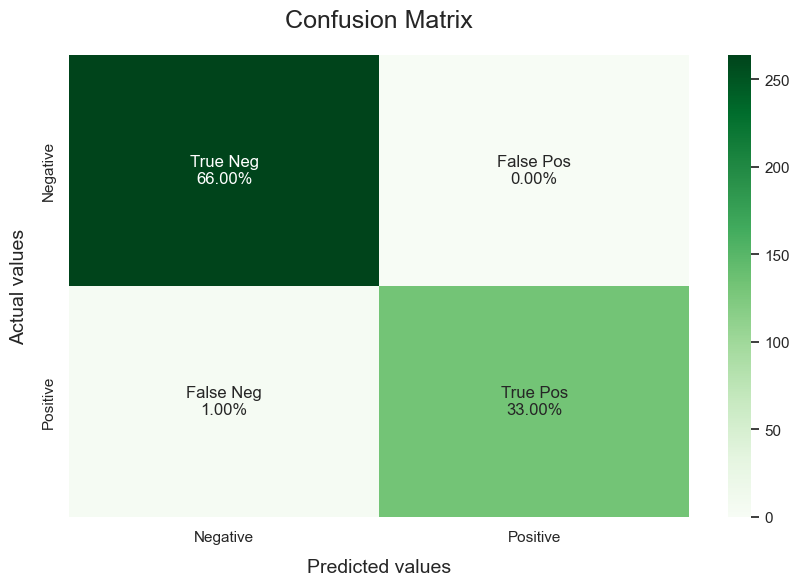

In [88]:
# Evaluation du modèle:
model_evaluation(y_test, y_pred_GKNNC) 

### 8.5.5 ROC curve and AUC with K-Nearest Neighbor

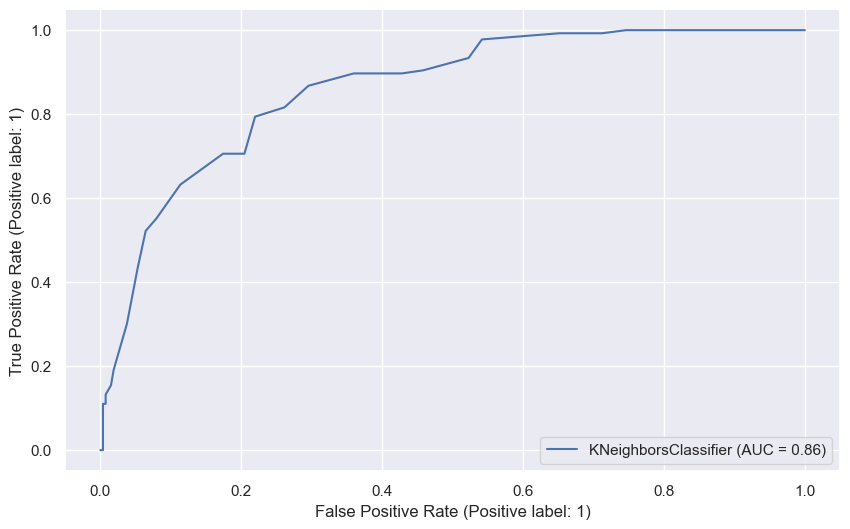

In [89]:
svc_disp = RocCurveDisplay.from_estimator(KNNClassifier, X_test, y_test)

## 8.8 XGBoosting (XGB) implementation

### 8.8.1 XGBoosting with default parameters

In [119]:
# Construction Model:
from xgboost import XGBClassifier
XGBoostClassifier = XGBClassifier(random_state=101)
# fit the model
XGBoostClassifier.fit(X_train, y_train)
# Predict values for Test dataset
y_pred_XGBC = XGBoostClassifier.predict(X_test)
# Predict training values for Test dataset
y_train_pred_XGBC = XGBoostClassifier.predict(X_train)

                 Confusion matrix
                 Score positive    Score negative
Actual positive       259                 5
Actual negative         2               134

Accuracy  0.98
 
           Positive      Negative
Num case      264           136
Precision    0.99          0.96
Recall       0.98          0.99
F1           0.99          0.97
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       264
           1       0.96      0.99      0.97       136

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



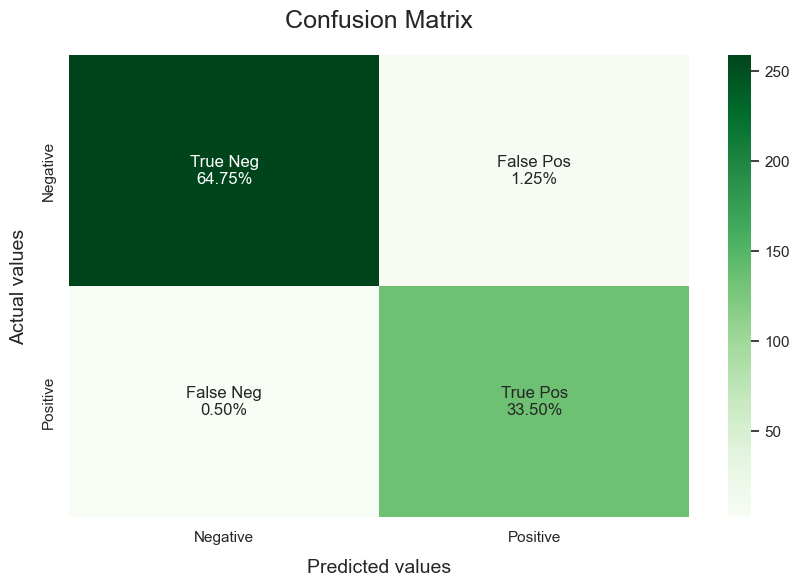

In [120]:
# Evaluation du modèle:
model_evaluation(y_test, y_pred_XGBC) 

### 8.8.2 XGBoosting with cross validation

In [121]:
bestXGBoostClassifier = XGBClassifier(random_state=101)
bestXGBoostClassifierScores = cross_validate(bestXGBoostClassifier, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
bestXGBoostClassifierScores = pd.DataFrame(bestXGBoostClassifierScores, index = range(1, 11))
print(bestXGBoostClassifierScores)

    fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
1   0.132516    0.003174        0.92500        0.888889     0.888889  0.888889
2   0.083793    0.002740        0.94375        0.881356     0.962963  0.920354
3   0.062167    0.002714        0.97500        0.932203     1.000000  0.964912
4   0.061044    0.002737        0.97500        0.947368     0.981818  0.964286
5   0.058120    0.002644        0.99375        1.000000     0.981818  0.990826
6   0.060536    0.002630        0.98750        0.981818     0.981818  0.981818
7   0.060452    0.002686        0.97500        0.963636     0.963636  0.963636
8   0.059064    0.002550        0.95000        0.943396     0.909091  0.925926
9   0.060706    0.002898        0.96875        0.931034     0.981818  0.955752
10  0.058159    0.002615        0.94375        0.960000     0.872727  0.914286


In [122]:
bestXGBoostClassifierScores.mean()

fit_time          0.069656
score_time        0.002739
test_accuracy     0.963750
test_precision    0.942970
test_recall       0.952458
test_f1           0.947068
dtype: float64

### 8.8.3 XGBoosting Feature Importance 

In [123]:
XGBoostClassifier.feature_importances_ 

array([0.09934099, 0.2252584 , 0.09097456, 0.09017874, 0.10127658,
       0.1595764 , 0.09625132, 0.13714296], dtype=float32)

In [124]:
features = pd.DataFrame(index=X.columns, data=XGBoostClassifier.feature_importances_, columns=["Feature Importance"])
XGBoostClassifierFeatureImportance = features.sort_values("Feature Importance", ascending=False)
print(XGBoostClassifierFeatureImportance)

                          Feature Importance
Glucose                             0.225258
BMI                                 0.159576
Age                                 0.137143
Insulin                             0.101277
Pregnancies                         0.099341
DiabetesPedigreeFunction            0.096251
BloodPressure                       0.090975
SkinThickness                       0.090179


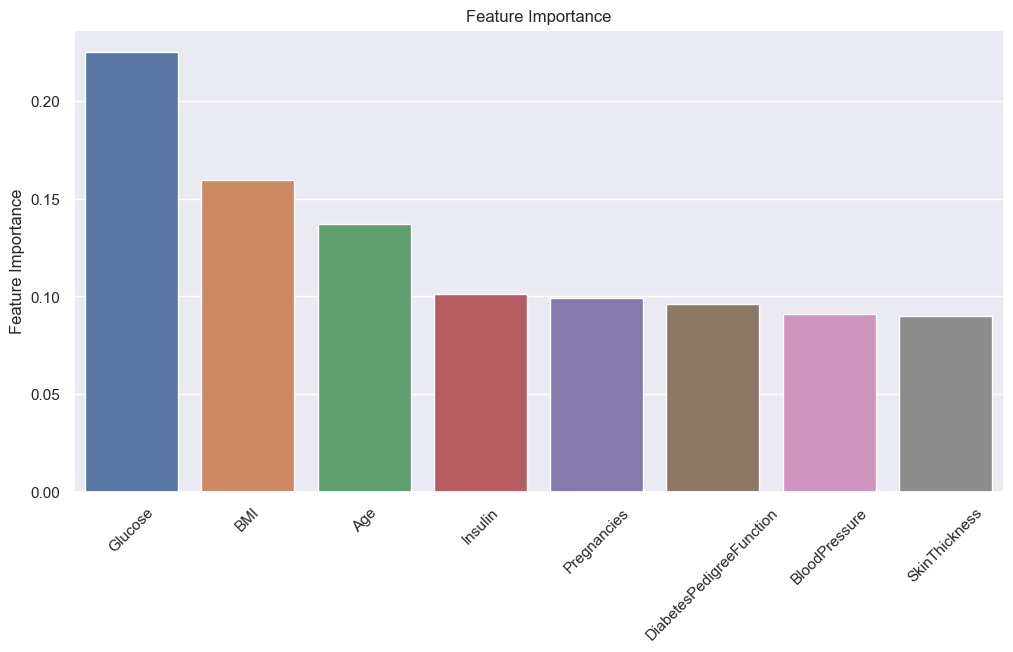

In [125]:
plt.figure(figsize=(12,6))
sns.barplot(y=XGBoostClassifierFeatureImportance["Feature Importance"], x=XGBoostClassifierFeatureImportance.index)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

### 8.8.4 XGBoosting with GridSearchCV

In [126]:
param_grid = {"n_estimators":[100, 300], 
              "max_depth":[3,5,6], 
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1], 
              "colsample_bytree":[0.5, 1]}

In [127]:
XGBoostClassifierGrid = XGBClassifier(random_state=42)
XGBoostClassifierGrid = GridSearchCV(XGBoostClassifierGrid, param_grid, scoring = "f1", verbose=2, n_jobs = -1)
XGBoostClassifierGrid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.1, 0.3], 'max_depth': [3, 5, 6],
                         'n_estimators': [100, 300], 'subsample': [0.5, 1]},
             scoring='f1', verbose=2)

In [128]:
print('\033[1mBest Parameters of GridSearchCV for RF Model:\033[0m', XGBoostClassifierGrid.best_params_)
print('\033[1mBest Estimator of GridSearchCV for RF Model:\033[0m', XGBoostClassifierGrid.best_estimator_)

Best Parameters of GridSearchCV for RF Model: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
Best Estimator of GridSearchCV for RF Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)


In [129]:
y_pred_GXGBC = XGBoostClassifierGrid.predict(X_test)
y_train_pred_GXGBC = XGBoostClassifierGrid.predict(X_train)

                 Confusion matrix
                 Score positive    Score negative
Actual positive       263                 1
Actual negative         1               135

Accuracy  0.99
 
           Positive      Negative
Num case      264           136
Precision    1.00          0.99
Recall       1.00          0.99
F1           1.00          0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       0.99      0.99      0.99       136

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



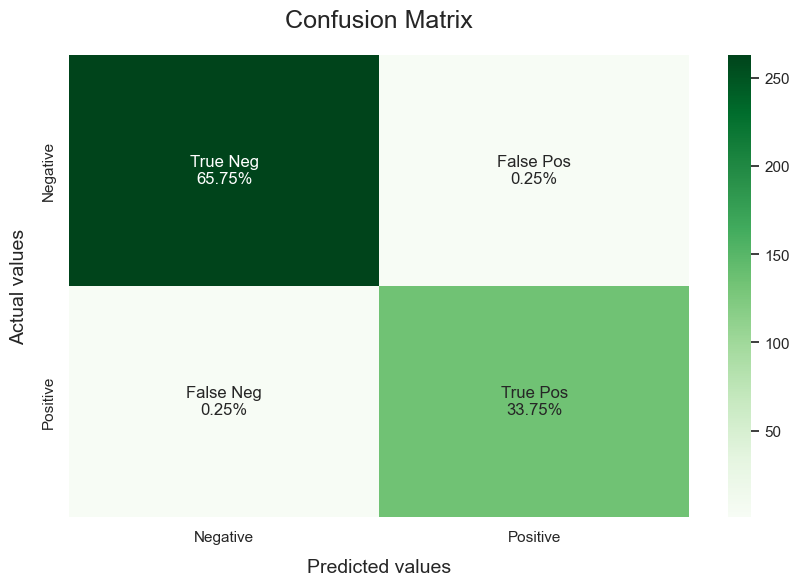

In [130]:
#Evaluation du modèle:
model_evaluation(y_test, y_pred_GXGBC) 

### 8.8.5 ROC curve and AUC with XGBoost Classifier

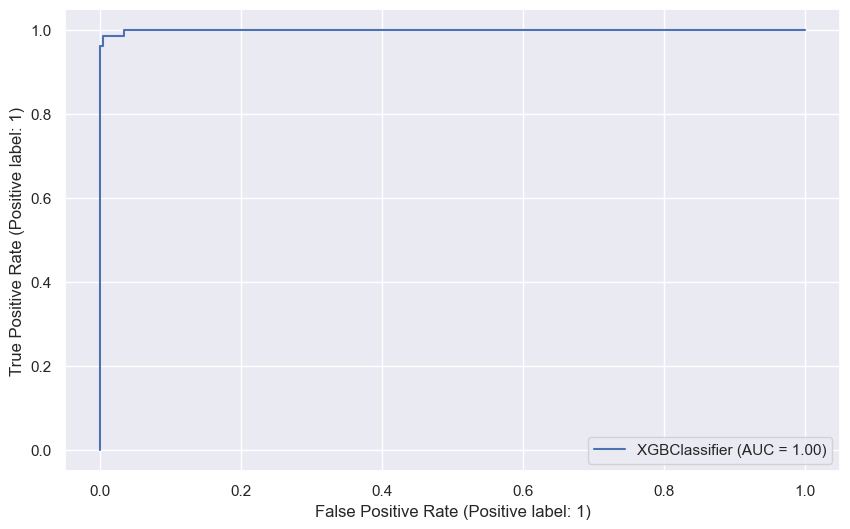

In [131]:
svc_disp = RocCurveDisplay.from_estimator(XGBoostClassifier, X_test, y_test)

In [214]:
XGBoostClassifierGrid.predict(X_test)
KNNGridModel.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,

In [239]:
import pickle

In [240]:
# save the model to disk
filenameXGB = 'finalizedXGBDiabete.sav'
pickle.dump(XGBoostClassifierGrid, open(filenameXGB, 'wb'))

filenameKNN = 'finalizedKNNDiabete.sav'
pickle.dump(KNNGridModel, open(filenameKNN, 'wb'))

In [241]:
# load the model fr9om disk
gridXGBAccuracy = pickle.load(open(filenameXGB, 'rb'))
print(gridXGBAccuracy)

gridKNNAccuracy = pickle.load(open(filenameKNN, 'rb'))
print(gridKNNAccuracy)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                

In [251]:
new_sample = np.array([[2, 138, 62, 35, 0, 33.6, 0.127, 47]])
print(new_sample)
new_sample = sc.transform(new_sample)
print(new_sample)
resulatKNN = gridKNNAccuracy.predict(new_sample)
print(resulatKNN)

[[2.00e+00 1.38e+02 6.20e+01 3.50e+01 0.00e+00 3.36e+01 1.27e-01 4.70e+01]]
[[2.00000000e+00 1.38000000e+02 6.20000000e+01 3.50000000e+01
  5.32907052e-17 3.36000000e+01 1.27000000e-01 4.70000000e+01]]
[1]


In [242]:
# Etat de deux personnes
6,154,74,32,193,29.3,0.839,39,0
dataPredict = {'Pregnancies':[2],
         'Glucose':[138], 
         'BloodPressure':[62],
         'SkinThickness':[35], 
         'Insulin':[0], 
         'BMI':[33.6], 
         'DiabetesPedigreeFunction':[0.127], 
         'Age':[47], 
         }

In [246]:
# Prediction du resultat
data = pd.DataFrame(dataPredict)
dataPredict = pd.DataFrame(dataPredict)
print(dataPredict)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(data)
dataPredict = sc.transform(dataPredict)
print(dataPredict)

          0         1         2         3         4         5         6  \
0 -0.520857  0.522935 -0.399852  0.884256 -0.735671  0.189619 -1.090676   

          7  
0  1.186291  
[[0. 0. 0. 0. 0. 0. 0. 0.]]


In [248]:
resulatXGB = gridXGBAccuracy.predict(data)
print(resulatXGB)

resulatKNN = gridKNNAccuracy.predict(data)
print(resulatKNN)

[0]
[0]
